In [1]:
%load_ext autoreload
%autoreload 2

from care_for_health import model_algo, maps, get_data, preprocessing, algorithm, stats_regions
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import json
import ast
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder

In [2]:
#data Communes France
#data_com_fr = get_data.get_full_medbase(region=None)
#data Communes voisines France
#data_com_neig = get_data.get_full_medbase_with_neighbors(region=None)
#data Régions France
#data_reg = get_data.get_data_region()

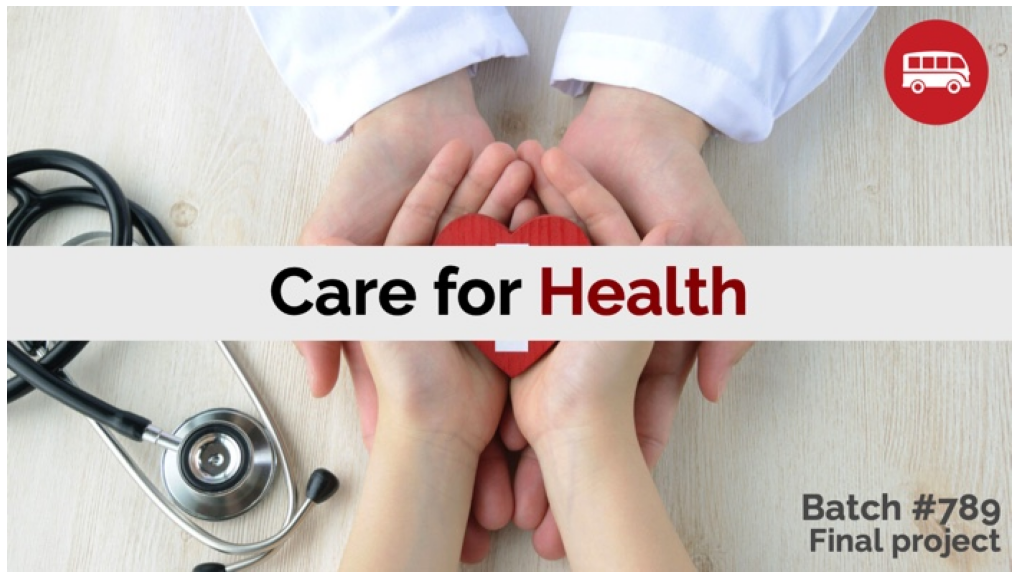

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../project_image_start.jpg')
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot()
imgplot = plt.imshow(img)
plt.grid(visible=False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(visible=False)
plt.yticks(visible=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# PROBLEM ❓

➡️ How to optimize the distribution of general practitioners in France?

# CONTEXT

## Actual regions map

In [4]:
data = pd.read_csv("../raw_data/fr_reg_stats_data_light.csv", delimiter=',', encoding='utf-8')
maps.chloropleth_map_regions(data,'code_regions','taux_de_couverture')

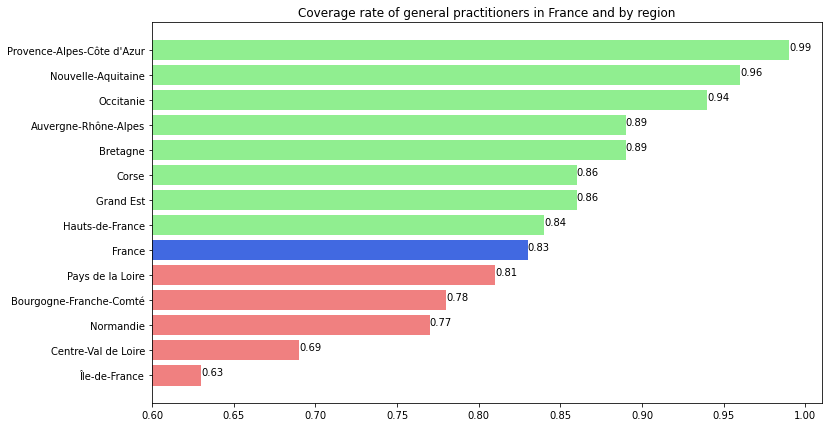

In [5]:
stats_regions.bar_plot_regions_fr();

⚠️ 5 regions below the global French coverage rate

⚠️ Manque de médecins en France

## Number of actual general practitioners and the need for general practitioners per 100,000 persons: France and regions

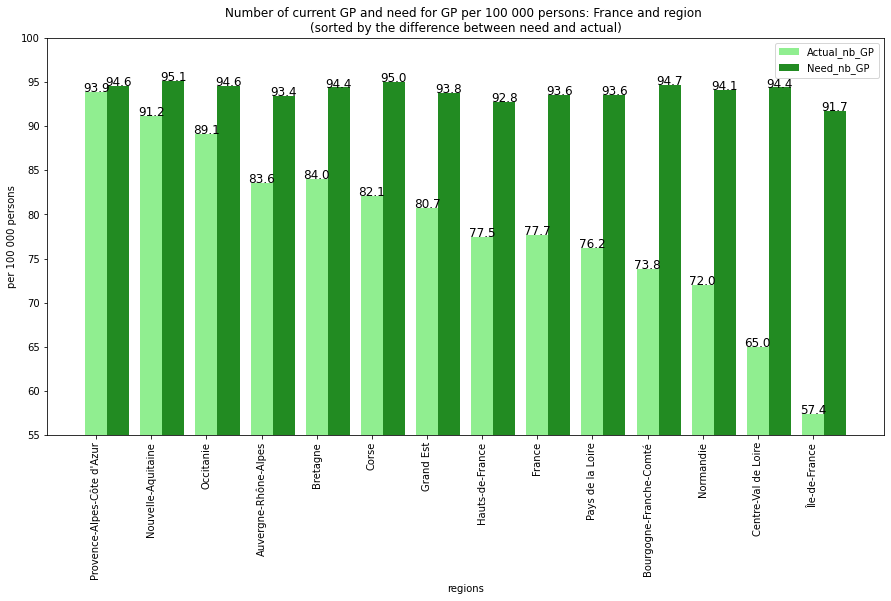

In [6]:
stats_regions.actual_need_gp();

## Percentage of municipalities with surplus and deficit general practitioners by region

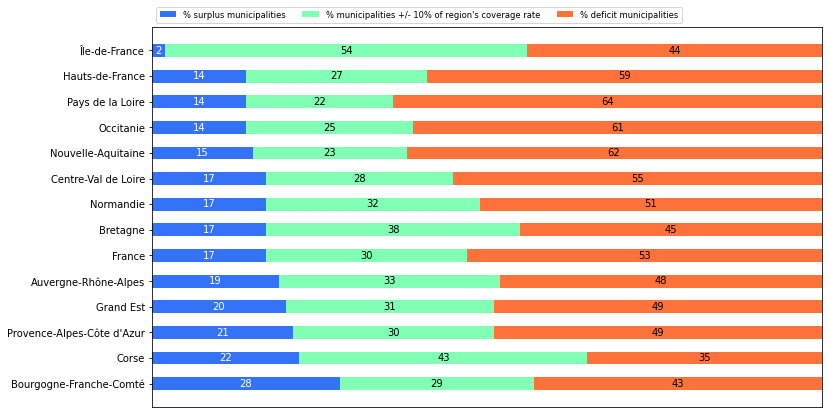

In [7]:
stats_regions.municipalities_exc_def();

## Percentage of municipalities by coverage rate range

ATTENTION PRENDRE DERNIERE VERSION DU CSV

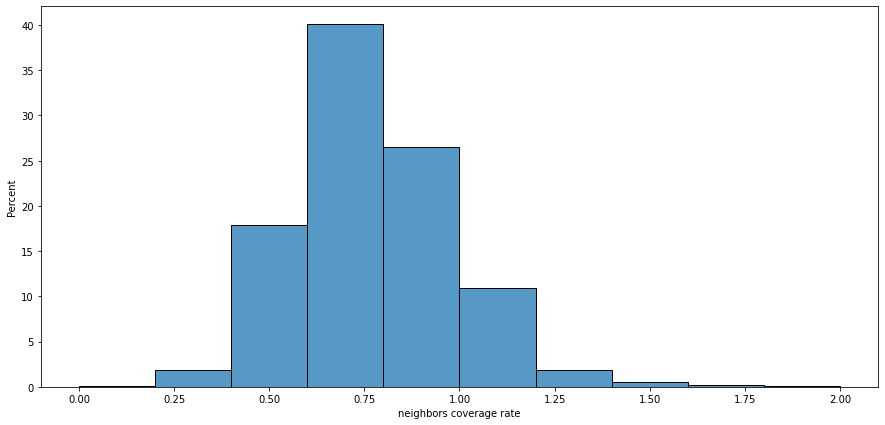

In [8]:
stats_regions.coverage_rate_range();

ouverture vers le model : on s'interesse donc communes par communes à la répartitions plus optimale

# *AlBrain* 🧠 MODEL

## Our approach

* Test multiple __redistributions combinations__, in order to __increase the number of cities__ covered by a sufficient number of general practitioners 
* A machine learning model doesn't exist, or not with this level of precision: so we decided to create our own algorithm

In [9]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get(
    'https://media.istockphoto.com/vectors/funny-kid-using-loader-machine-vector-id1225864810?k=20&m=1225864810&s=612x612&w=0&h=7kQVu_RV-12lsPV96cO-M7mPvPS3yGNgtWQbxdl17n0='
)
img = Image.open(BytesIO(response.content))

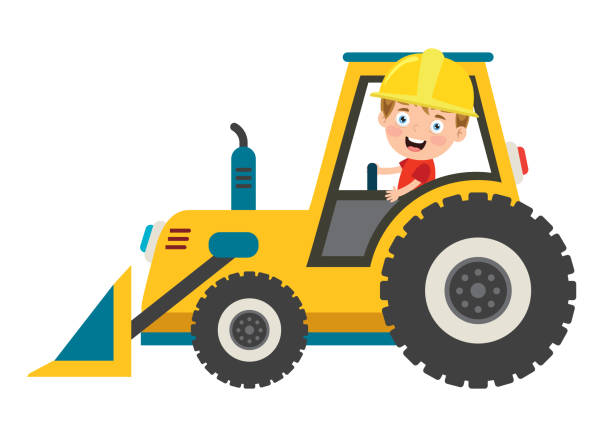

In [10]:
img

## Model presentation

The algorithm takes 7 parameters: 
- __Medecin_selection__: 'all for redispatch' / 'only exceeding'
- __Radius__: maximal distance, in kilometers, to move a given general practitioners
- __Sortby__: how do you want to re-allocate practitioners? Based on distance, on local gaps, on a given calculation...
- __Weight of neighbors__: increase or reduce the impact of nearby practitioners on allocation calculation
- __Number of neighbors__: minimum number of neighbors needed to perform a dispatch
- __Breakeven__: rate at which we consider a city is above / below target
- __Recalculate__: update all ratios after each dispatch

## __Model construction__

__The model is built as follows:__ 
* Inside of a __Class__, the algorithm is coded similarly to any SKlearn estimator
* Custom __Grid_search__ method to find _best parameters_
```python
model = model_algo.Medical_ReDispatch(
    selection_medecins='tous',
    sortby='calculated',
    radius=15,
    moy_region=0.84,
    recalcul=False,
    poids_des_voisins=0.1,
    nb_voisins_minimum=3,
)
```
__3 additional methods__ support model's execution:
* 'general_practitioners_number', that calculates, based on our parameters, _how many GPs to allocate_
* 'sort_neighbors', that returns a _sorted list of neighbor cities_ based on our parameters (distance, absolute or relative number of missing GPs...)
* 'get_updated_cover_rate', that recalculates, for a given city & its _neighborhood ratios_

## __Model routine__

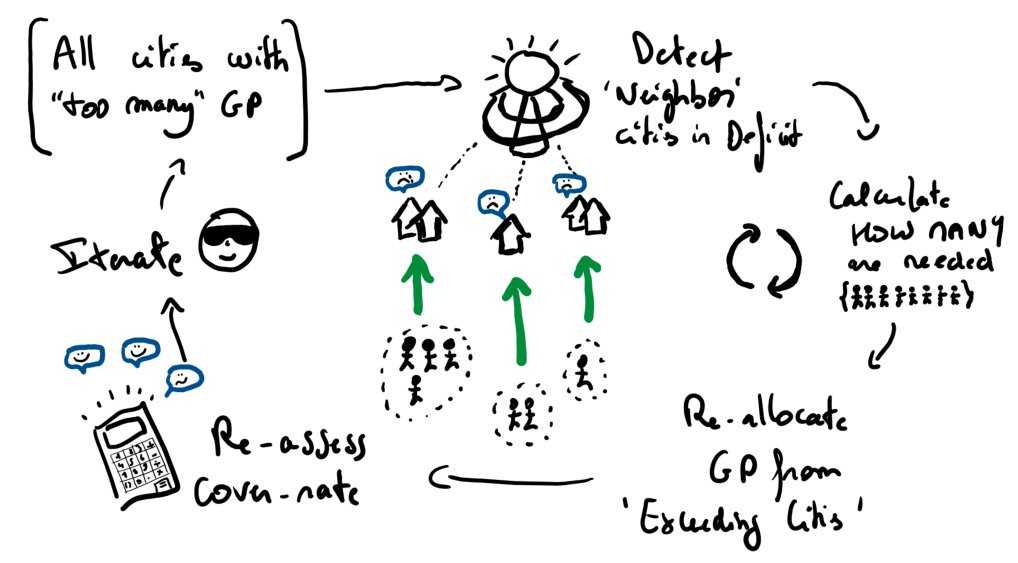

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../model_description.png')
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot()
imgplot = plt.imshow(img)
plt.grid(visible=False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(visible=False)
plt.yticks(visible=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
#fig.show()

# RESULTS

> Lien Streamlit

# CONCLUSION

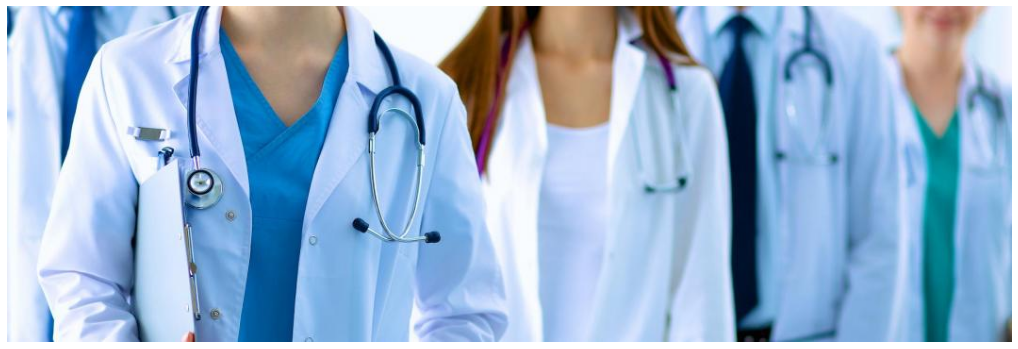

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../image_medecins_end.jpeg')
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot()
imgplot = plt.imshow(img)
plt.grid(visible=False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(visible=False)
plt.yticks(visible=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

- Conclusion : 


- Ouverture :
météo, autres spécialités, autres infrastructures médicales (pharmacies, services d'urgence),